In [1]:
# Evaluation of experiments
import matplotlib.pyplot as plt
import pandas as pd

#dfExperiments = pd.read_csv('experiments_similarityScore_45_negativeSamples_3_2019-01-07T15-19-40.063.csv', sep=',', low_memory=False, header=None)
dfExperiments = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T14-39-25.415.csv', sep=',', low_memory=False, header=None)

dfExperimentsHARD = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T14-39-25.415.csv', sep=',', low_memory=False, header=None)

dfExperiments.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperimentsHARD.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']

In [2]:
#Rearrange DataFrame
def rearrange(df):
    dfAllExperimentsRearranged = pd.DataFrame()
    for index, row in df.iterrows():
        rowPrecision = row
        rowPrecision['ResultValue'] = row['Precision-Delta']
        rowPrecision['ResultValueType'] = 'Precision-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        rowRecall = row
        rowRecall['ResultValue'] = row['Recall-Delta']
        rowRecall['ResultValueType'] = 'Recall-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        #rowF1 = row
        #rowF1['ResultValue'] = row['F-1']
        #rowF1['ResultValueType'] = 'F-1'
        
        #dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowF1)
    
    return dfAllExperimentsRearranged

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotResults(df, title):
    sns.set(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(20,8))
    sns.catplot(x="shortExperiment", y="ResultValue", hue="ResultValueType", data=df, height=6, kind="bar", ax=ax1)
    
    titleAll = 'Transfer Comparison ' + title
    ax1.set_title(titleAll, fontweight="bold", size=20) # Title
    ax1.set_xlabel("Experiments",fontsize = 20.0)
    ax1.set_ylabel("" ,fontsize = 20.0) # Y label
    ax1.tick_params(direction='out', length=6, width=2, labelsize=20, grid_alpha=0.5)
    ax1.tick_params(axis = 'x', labelrotation=45)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

In [4]:
dfBaselineSubSet = dfExperimentsHARD[dfExperimentsHARD['Experiment'].str.contains('baseline_')]
dfBestBaseline = pd.DataFrame()
for target in set(dfBaselineSubSet['TargetTable']):
    dfTargetBaseline = dfBaselineSubSet[dfBaselineSubSet['TargetTable'] == target]
    dfTargetBaseline = dfTargetBaseline.sort_values(by=['F-1'], ascending=False)
    dfBestBaseline = dfBestBaseline.append(dfTargetBaseline.iloc[0])
display(dfBestBaseline)

,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
10,NaN,NaN,author,baseline_bag_of_words_author-all,0.779043,0.675889,0.919355,all,2019-01-07_14-38-39-866,NaN,all
6,NaN,NaN,author,baseline_label_author-WikiDataAuthors.csv,0.796000,0.670034,0.980296,WikiDataAuthors.csv,2019-01-07_14-38-39-105,NaN,WikiDataAuthors.csv
4,NaN,NaN,author,baseline_bag_of_words_author-VIAFDataAuthors.csv,0.808511,0.853933,0.767677,VIAFDataAuthors.csv,2019-01-07_14-38-38-400,NaN,VIAFDataAuthors.csv
1,NaN,NaN,author,baseline_bag_of_words_author-DnbDataAuthors.csv,0.859155,0.762500,0.983871,DnbDataAuthors.csv,2019-01-07_14-38-37-887,NaN,DnbDataAuthors.csv


,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
10,NaN,NaN,author,baseline_bag_of_words_author-all,0.779043,0.675889,0.919355,all,2019-01-07_14-38-39-866,NaN,all
6,NaN,NaN,author,baseline_label_author-WikiDataAuthors.csv,0.796000,0.670034,0.980296,WikiDataAuthors.csv,2019-01-07_14-38-39-105,NaN,WikiDataAuthors.csv
4,NaN,NaN,author,baseline_bag_of_words_author-VIAFDataAuthors.csv,0.808511,0.853933,0.767677,VIAFDataAuthors.csv,2019-01-07_14-38-38-400,NaN,VIAFDataAuthors.csv
1,NaN,NaN,author,baseline_bag_of_words_author-DnbDataAuthors.csv,0.859155,0.762500,0.983871,DnbDataAuthors.csv,2019-01-07_14-38-37-887,NaN,DnbDataAuthors.csv


,Timestamp,Experiment,Class,TargetTable,Precision,Recall,F-1,Blocker,BlockingFunction,TrainedOn,TrainedModel
13,2019-01-07_14-38-45-993,transfer_matchingRule_author-DnbDataAuthors.csv,author,VIAFDataAuthors.csv,0.983607,0.606061,0.750000,NaN,NaN,DnbDataAuthors.csv,J48
14,2019-01-07_14-38-46-635,transfer_matchingRule_author-DnbDataAuthors.csv,author,WikiDataAuthors.csv,0.809129,0.960591,0.878378,NaN,NaN,DnbDataAuthors.csv,J48
15,2019-01-07_14-38-47-753,transfer_matchingRule_author-DnbDataAuthors.csv,author,all,0.917647,0.838710,0.876404,NaN,NaN,DnbDataAuthors.csv,J48
17,2019-01-07_14-38-50-369,transfer_matchingRule_author-VIAFDataAuthors.csv,author,DnbDataAuthors.csv,0.880597,0.951613,0.914729,NaN,NaN,VIAFDataAuthors.csv,J48
18,2019-01-07_14-38-50-623,transfer_matchingRule_author-VIAFDataAuthors.csv,author,WikiDataAuthors.csv,0.869565,0.985222,0.923788,NaN,NaN,VIAFDataAuthors.csv,J48
19,2019-01-07_14-38-51-267,transfer_matchingRule_author-VIAFDataAuthors.csv,author,all,0.909548,0.973118,0.940260,NaN,NaN,VIAFDataAuthors.csv,J48
21,2019-01-07_14-38-54-744,transfer_matchingRule_author-WikiDataAuthors.csv,author,DnbDataAuthors.csv,0.961538,0.806452,0.877193,NaN,NaN,WikiDataAuthors.csv,J48
22,2019-01-07_14-38-55-032,transfer_matchingRule_author-WikiDataAuthors.csv,author,VIAFDataAuthors.csv,1.000000,0.626263,0.770186,NaN,NaN,WikiDataAuthors.csv,J48
23,2019-01-07_14-38-55-377,transfer_matchingRule_author-WikiDataAuthors.csv,author,all,0.974026,0.806452,0.882353,NaN,NaN,WikiDataAuthors.csv,J48
25,2019-01-07_14-38-58-985,transfer_matchingRule_author-all,author,DnbDataAuthors.csv,0.967213,0.951613,0.959350,NaN,NaN,all,J48


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.092036,-0.292304,Recall-Delta-Mean,0.107015,SimpleLogistic-DnbDataAuthors.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.104351,0.002984,Recall-Delta-Mean,0.047175,SimpleLogistic-VIAFDataAuthors.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.077753,-0.072065,Recall-Delta-Mean,0.090084,SimpleLogistic-WikiDataAuthors.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.130716,0.063238,Recall-Delta-Mean,0.048391,SimpleLogistic-all


0.0677

0.0684

,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.040410,0.170176,Precision-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
1,0.040410,-0.087322,Recall-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
2,0.040410,0.170176,Precision-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
3,0.040410,-0.087322,Recall-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
4,0.040410,0.170176,Precision-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
5,0.040410,-0.087322,Recall-Delta-Mean,0.085994,J48-DnbDataAuthors.csv
6,-0.092036,0.166933,Precision-Delta-Mean,0.107015,SimpleLogistic-DnbDataAuthors.csv
7,-0.092036,-0.292304,Recall-Delta-Mean,0.107015,SimpleLogistic-DnbDataAuthors.csv
8,-0.092036,0.166933,Precision-Delta-Mean,0.107015,SimpleLogistic-DnbDataAuthors.csv
9,-0.092036,-0.292304,Recall-Delta-Mean,0.107015,SimpleLogistic-DnbDataAuthors.csv


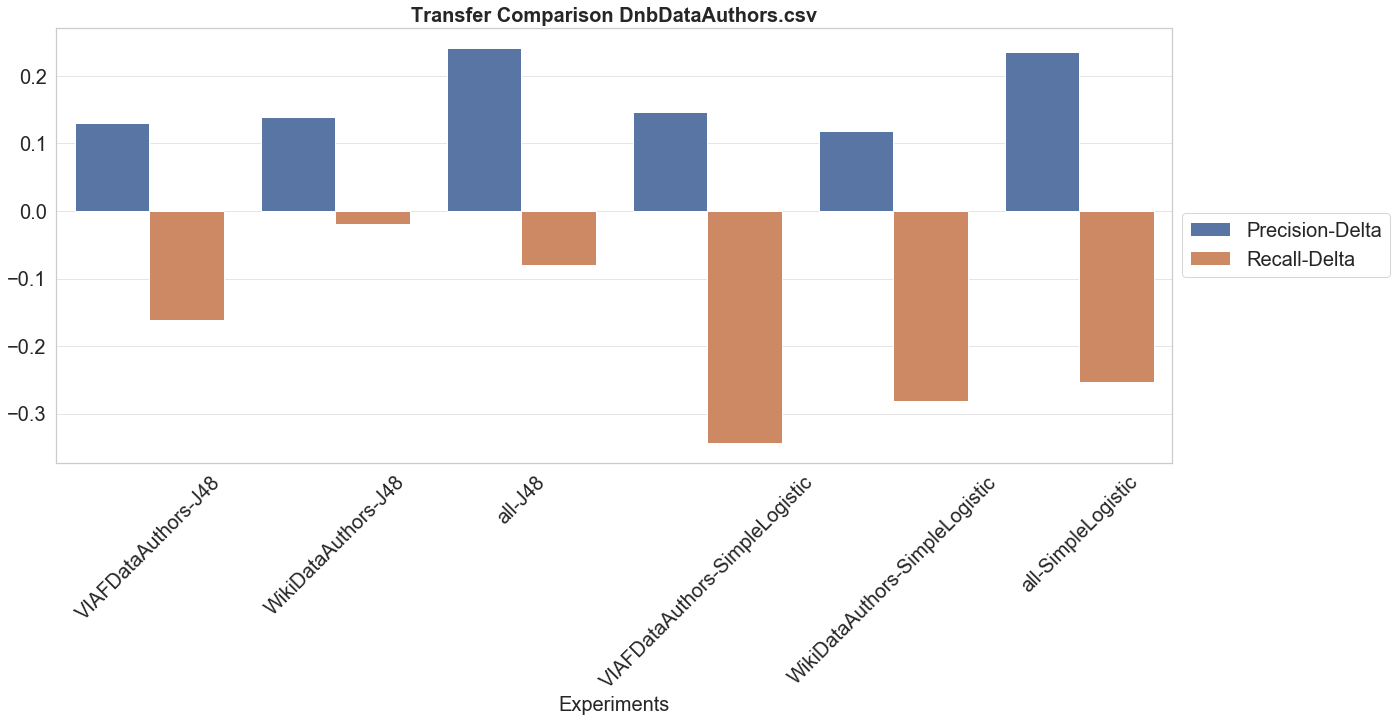

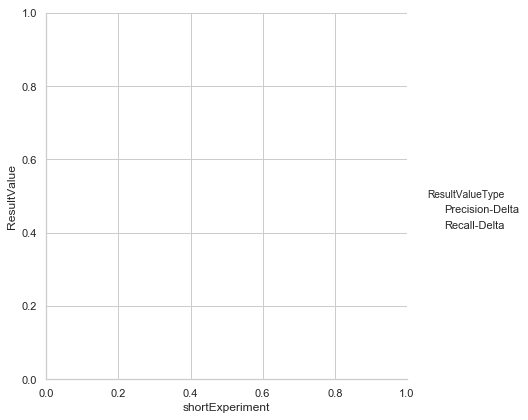

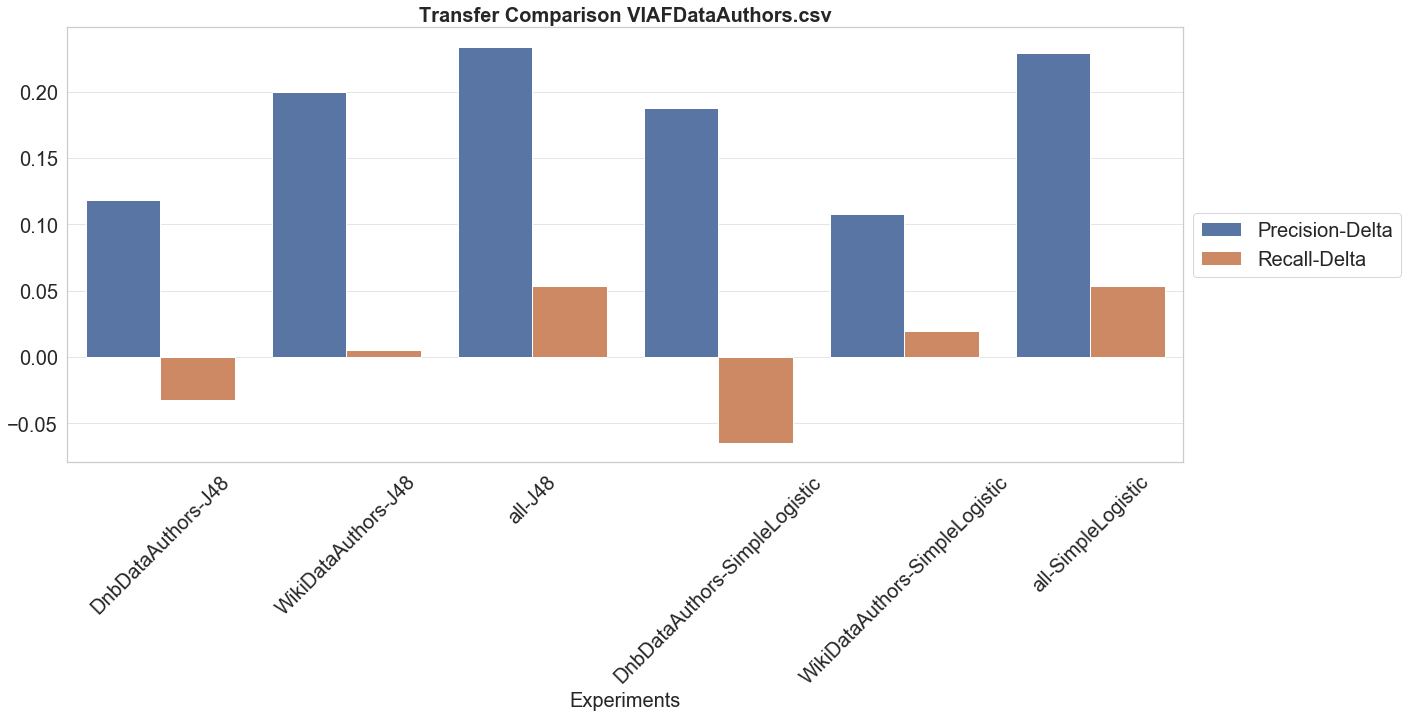

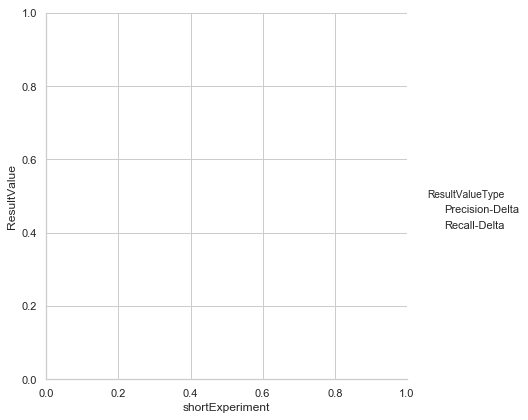

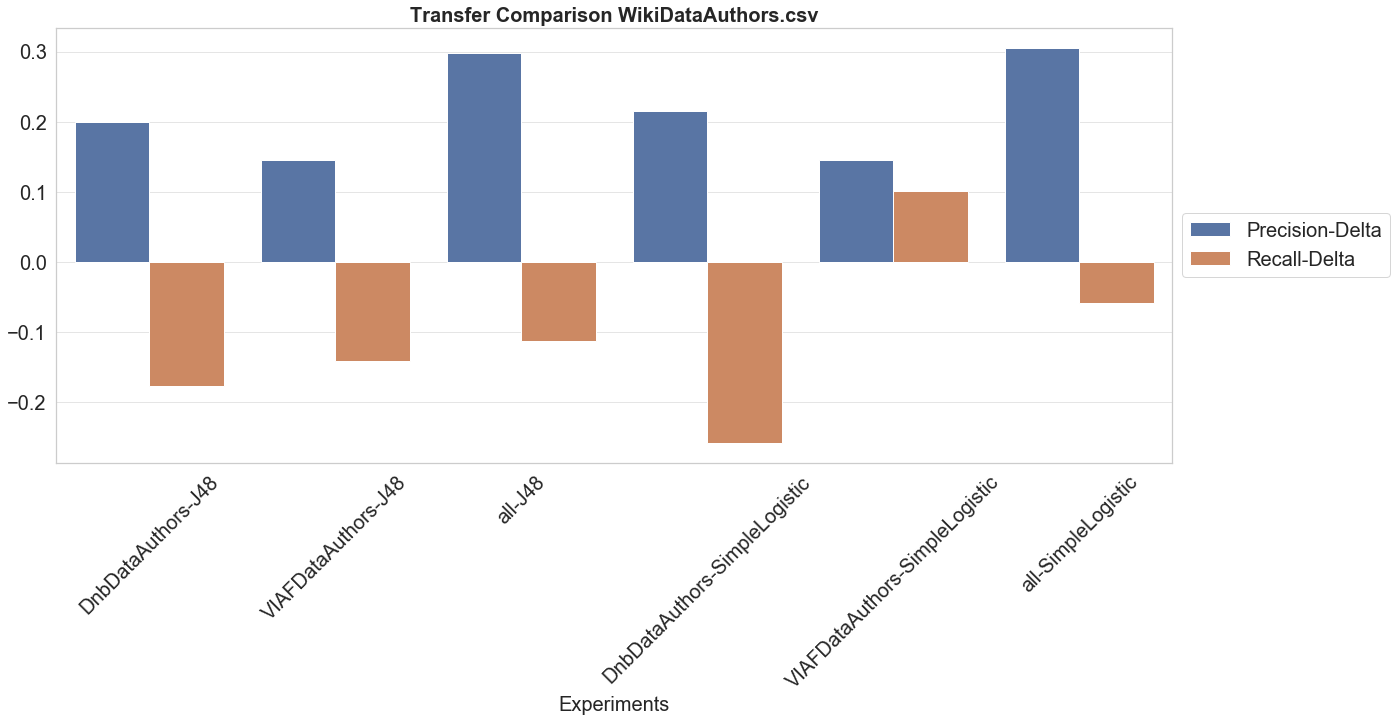

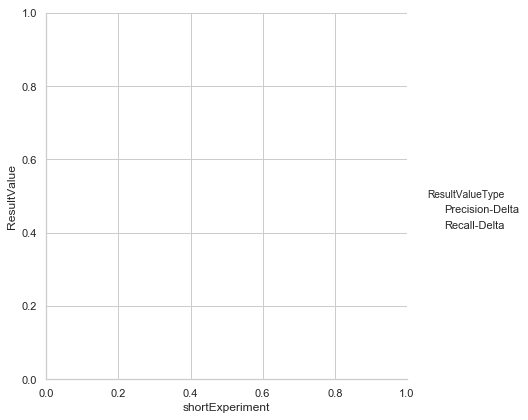

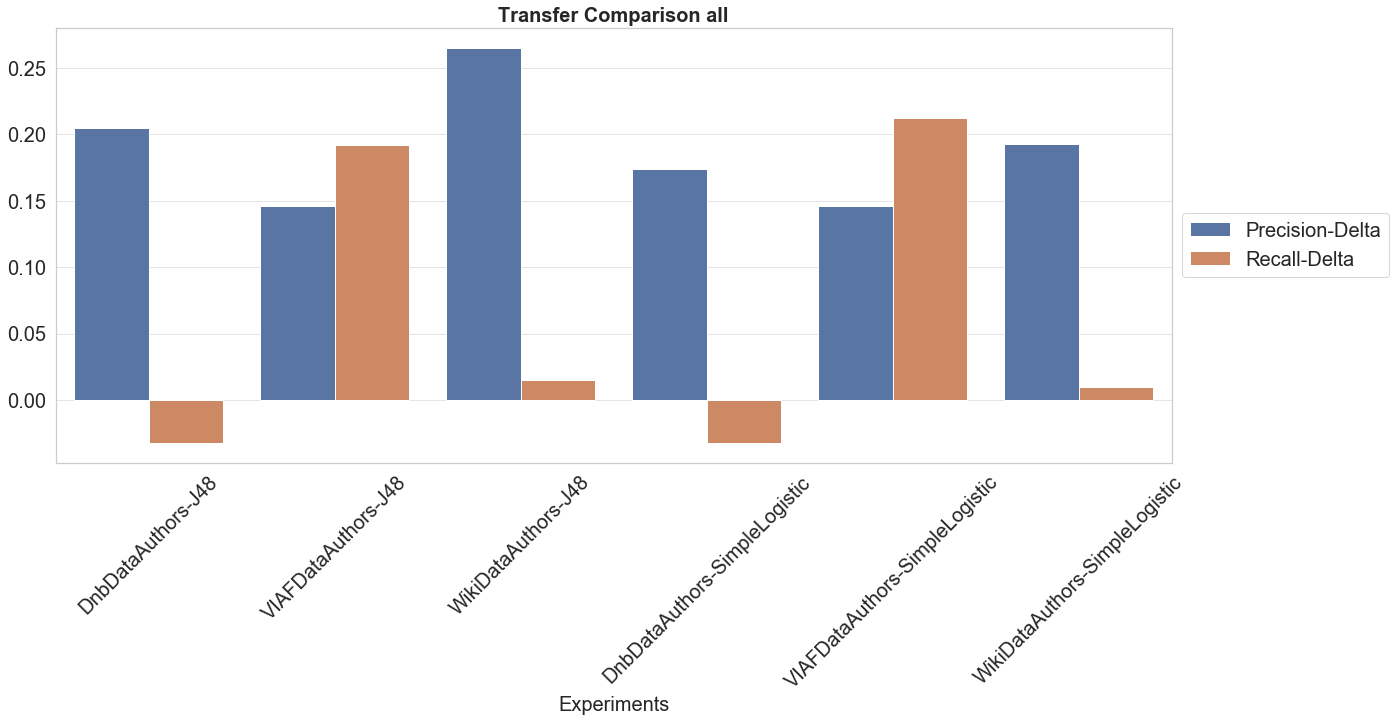

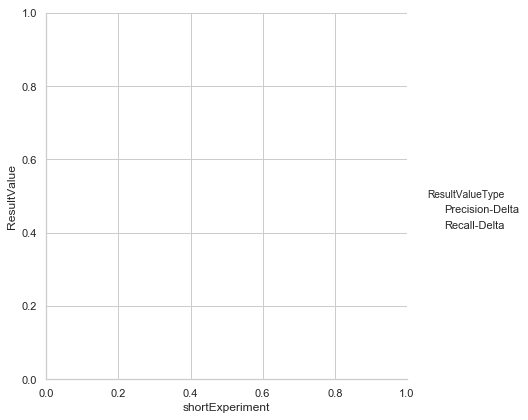

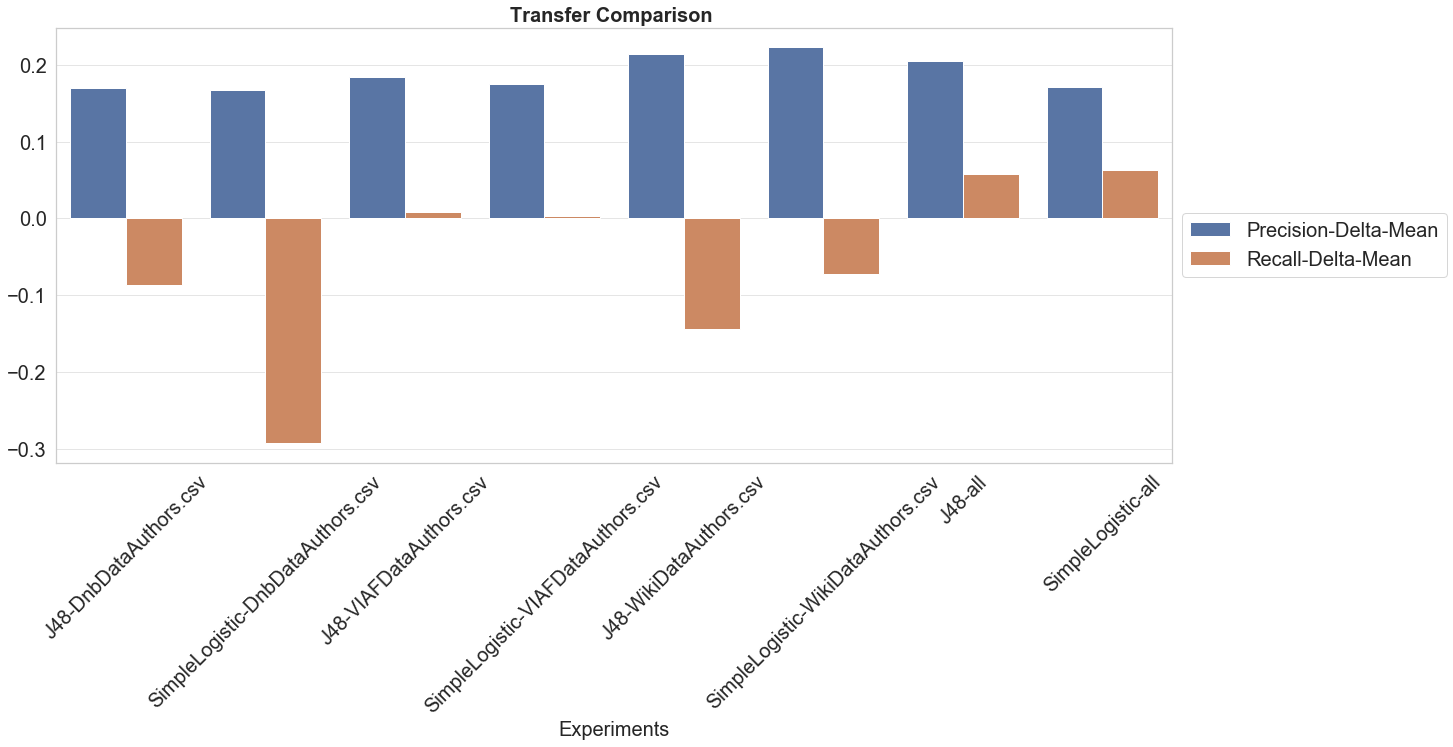

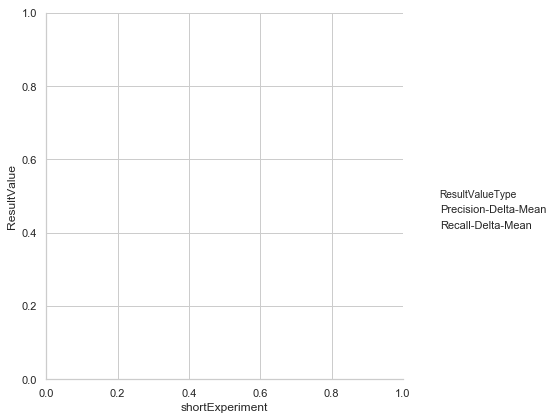

In [5]:
#Keep only transfer Experiments
dfExperimentsTransfer = dfExperiments[dfExperiments['Experiment'].str.contains('transfer_')]
dfExperimentsLearned = dfBestBaseline


dfMeanRulePerformance = pd.DataFrame()

display(dfExperimentsLearned)
display(dfExperimentsTransfer)
for trainedOn in dfExperimentsTransfer['TrainedOn'].unique():
    dfTransferExperimentsTmpCompared = pd.DataFrame()
    
    dfSubSetExperimentsTransfer = dfExperimentsTransfer[dfExperimentsTransfer['TrainedOn'] == trainedOn]
    
    for indexTransfer, rowTransfer in dfSubSetExperimentsTransfer.iterrows():
        for indexLearned, rowLearned in dfExperimentsLearned.iterrows():
            if rowTransfer['TargetTable'] == rowLearned['TargetTable']:
                newRow = rowTransfer.copy()
                newRow['Precision-Delta'] = rowTransfer['Precision'] - rowLearned['Precision']
                newRow['Recall-Delta'] = rowTransfer['Recall'] - rowLearned['Recall']
                newRow['F-1-Delta'] = rowTransfer['F-1'] - rowLearned['F-1']
                newRow['Experiment'] = rowTransfer['Experiment']
            
                dfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared.append(newRow, ignore_index=True)
     
    #display(dfTransferExperimentsTmpCompared)
    meanRulePerformance = {}
    for model in dfTransferExperimentsTmpCompared['TrainedModel']:
        subdfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared[dfTransferExperimentsTmpCompared['TrainedModel'] == model]

        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Precision-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Precision-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
        
        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Recall-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Recall-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
    dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    display(dfMeanPerfSingle)
    dfTransferExperimentsTmpComparedRearranged = rearrange(dfTransferExperimentsTmpCompared)
    dfTransferExperimentsTmpComparedRearranged['shortExperiment'] = dfTransferExperimentsTmpComparedRearranged['TargetTable'].str.replace('hotels_www.','').str.replace('.csv', '').str.cat(dfTransferExperimentsTmpComparedRearranged['TrainedModel'], sep='-')
    plotResults(dfTransferExperimentsTmpComparedRearranged, trainedOn)
    
plotResults(dfMeanRulePerformance, '')
display(round(dfMeanRulePerformance['MeanF1Delta'].mean(),4))
display(round(dfMeanRulePerformance['StdF1Delta'].mean(),4))
display(dfMeanRulePerformance)

In [6]:
#dfExperimentsTransfer = dfExperiments[dfExperiments['Experiment'].str.contains('transfer_')]
#dfExperimentsLearned = dfBestBaseline
import csv
dfExperimentsTransferFiltered = dfExperimentsTransfer.filter(items=['Experiment','Precision', 'Recall', 'F-1', 'TargetTable', 'TrainedOn', 'TrainedModel'])
dfResultsRQ2 = pd.DataFrame()

for target in set(dfExperimentsTransferFiltered['TargetTable']):
    dfSubSeTransfertExperiments = dfExperimentsTransferFiltered[dfExperimentsTransferFiltered['TargetTable'] == target]
    dfSubBestBaseline = dfBestBaseline[dfBestBaseline['TargetTable'] == target]
    bestBaseline = dfSubBestBaseline.iloc[0]
    dfSubSeTransfertExperiments['F-1 Baseline'] = bestBaseline['F-1']
    dfSubSeTransfertExperiments['Precision Baseline'] = bestBaseline['Precision']
    dfSubSeTransfertExperiments['Recall Baseline'] = bestBaseline['Recall']
    
    
    dfSubSeTransfertExperiments['Delta F-1'] = dfSubSeTransfertExperiments['F-1'] - dfSubSeTransfertExperiments['F-1 Baseline']
    dfSubSeTransfertExperiments['Delta Precision'] = dfSubSeTransfertExperiments['Precision'] - dfSubSeTransfertExperiments['Precision Baseline']
    dfSubSeTransfertExperiments['Delta Recall'] = dfSubSeTransfertExperiments['Recall'] - dfSubSeTransfertExperiments['Recall Baseline']
    #dfSubSeTransfertExperiments['Delta Precision'] = bestBaseline['Precision'].subtract(dfSubSeTransfertExperiments['Precision Baseline'])
    #dfSubSeTransfertExperiments['Delta Recall'] = bestBaseline['Recall'].subtract(dfSubSeTransfertExperiments['Recall Baseline'])
    dfResultsRQ2 = dfResultsRQ2 .append(dfSubSeTransfertExperiments)

display(dfResultsRQ2)
dfResultsRQ2.to_csv('rq2_results_authors.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Experiment,Precision,Recall,F-1,TargetTable,TrainedOn,TrainedModel,F-1 Baseline,Precision Baseline,Recall Baseline,Best Baseline,Delta F-1,Delta Precision,Delta Recall
15,transfer_matchingRule_author-DnbDataAuthors.csv,0.917647,0.838710,0.876404,all,DnbDataAuthors.csv,J48,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,0.097361,0.241758,-0.080645
19,transfer_matchingRule_author-VIAFDataAuthors.csv,0.909548,0.973118,0.940260,all,VIAFDataAuthors.csv,J48,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,0.161216,0.233658,0.053763
23,transfer_matchingRule_author-WikiDataAuthors.csv,0.974026,0.806452,0.882353,all,WikiDataAuthors.csv,J48,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,0.103310,0.298137,-0.112903
31,transfer_matchingRule_author-DnbDataAuthors.csv,0.911765,0.666667,0.770186,all,DnbDataAuthors.csv,SimpleLogistic,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,-0.008857,0.235875,-0.252688
35,transfer_matchingRule_author-VIAFDataAuthors.csv,0.905000,0.973118,0.937824,all,VIAFDataAuthors.csv,SimpleLogistic,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,0.158781,0.229111,0.053763
39,transfer_matchingRule_author-WikiDataAuthors.csv,0.981595,0.860215,0.916905,all,WikiDataAuthors.csv,SimpleLogistic,0.779043,0.675889,0.919355,baseline_bag_of_words_author-all,0.137862,0.305706,-0.059140
14,transfer_matchingRule_author-DnbDataAuthors.csv,0.809129,0.960591,0.878378,WikiDataAuthors.csv,DnbDataAuthors.csv,J48,0.796000,0.670034,0.980296,baseline_label_author-WikiDataAuthors.csv,0.082378,0.139095,-0.019704
18,transfer_matchingRule_author-VIAFDataAuthors.csv,0.869565,0.985222,0.923788,WikiDataAuthors.csv,VIAFDataAuthors.csv,J48,0.796000,0.670034,0.980296,baseline_label_author-WikiDataAuthors.csv,0.127788,0.199532,0.004926
27,transfer_matchingRule_author-all,0.935185,0.995074,0.964200,WikiDataAuthors.csv,all,J48,0.796000,0.670034,0.980296,baseline_label_author-WikiDataAuthors.csv,0.168200,0.265152,0.014778
30,transfer_matchingRule_author-DnbDataAuthors.csv,0.788889,0.699507,0.741514,WikiDataAuthors.csv,DnbDataAuthors.csv,SimpleLogistic,0.796000,0.670034,0.980296,baseline_label_author-WikiDataAuthors.csv,-0.054486,0.118855,-0.280788


In [7]:
dfResultsRQ2 = dfResultsRQ2.sort_values(by=['TargetTable', 'TrainedOn', 'TrainedModel'])

dfResultsRQ2Filtered = dfResultsRQ2.filter(items=['TargetTable', 'TrainedOn', 'TrainedModel', 'Precision', 'Recall',  'F-1','Best Baseline','Delta Precision','Delta Recall','Delta F-1'])
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.replace('baseline_', '').str.replace('_author', '')
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.split('-', expand=True)[0]
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('J48', 'DT')
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('SimpleLogistic', 'LR')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('DnbDataAuthors.csv', 'DNB')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('VIAFDataAuthors.csv', 'VIAF')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('WikiDataAuthors.csv', 'WD')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('all', 'All')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('bag_of_words', 'BoW')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('label', 'Label')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.round(3)
display(dfResultsRQ2Filtered)

print(dfResultsRQ2Filtered.to_latex(index=False))
dfResultsRQ2Filtered.to_csv('rq2_results_authors.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

,TargetTable,TrainedOn,TrainedModel,Precision,Recall,F-1,Best Baseline,Delta Precision,Delta Recall,Delta F-1
17,DNB,VIAF,DT,0.881,0.952,0.915,BoW,0.118,-0.032,0.056
33,DNB,VIAF,LR,0.950,0.919,0.934,BoW,0.188,-0.065,0.075
21,DNB,WD,DT,0.962,0.806,0.877,BoW,0.199,-0.177,0.018
37,DNB,WD,LR,0.978,0.726,0.833,BoW,0.216,-0.258,-0.026
25,DNB,All,DT,0.967,0.952,0.959,BoW,0.205,-0.032,0.100
41,DNB,All,LR,0.937,0.952,0.944,BoW,0.174,-0.032,0.085
13,VIAF,DNB,DT,0.984,0.606,0.750,BoW,0.130,-0.162,-0.059
29,VIAF,DNB,LR,1.000,0.424,0.596,BoW,0.146,-0.343,-0.213
22,VIAF,WD,DT,1.000,0.626,0.770,BoW,0.146,-0.141,-0.038
38,VIAF,WD,LR,1.000,0.869,0.930,BoW,0.146,0.101,0.121


\begin{tabular}{lllrrrlrrr}
\toprule
TargetTable & TrainedOn & TrainedModel &  Precision &  Recall &    F-1 & Best Baseline &  Delta Precision &  Delta Recall &  Delta F-1 \\
\midrule
        DNB &      VIAF &           DT &      0.881 &   0.952 &  0.915 &           BoW &            0.118 &        -0.032 &      0.056 \\
        DNB &      VIAF &           LR &      0.950 &   0.919 &  0.934 &           BoW &            0.188 &        -0.065 &      0.075 \\
        DNB &        WD &           DT &      0.962 &   0.806 &  0.877 &           BoW &            0.199 &        -0.177 &      0.018 \\
        DNB &        WD &           LR &      0.978 &   0.726 &  0.833 &           BoW &            0.216 &        -0.258 &     -0.026 \\
        DNB &       All &           DT &      0.967 &   0.952 &  0.959 &           BoW &            0.205 &        -0.032 &      0.100 \\
        DNB &       All &           LR &      0.937 &   0.952 &  0.944 &           BoW &            0.174 &        -0.032 &   